In [3]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [4]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [6]:
df = spark.read.parquet('washing.parquet')


In [7]:
df.count()

2058

In [8]:
df.createOrReplaceTempView("washing")
spark.sql("SELECT * FROM washing").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [9]:
result = spark.sql("select voltage from washing where voltage is not null")
result.show()
result_array = result.rdd.map(lambda row : row.voltage).sample(False,0.1).collect()

#just print the 1st 15 elements
result_array[:15]

+-------+
|voltage|
+-------+
|    236|
|    235|
|    228|
|    236|
|    233|
|    226|
|    235|
|    220|
|    225|
|    239|
|    230|
|    236|
|    244|
|    235|
|    234|
|    224|
|    225|
|    223|
|    236|
|    226|
+-------+
only showing top 20 rows



[236, 233, 225, 236, 225, 226, 223, 228, 235, 227, 222, 231, 237, 235, 250]

In [10]:
print(len(result_array))

44


In [11]:
type(result_array)

list

In [12]:
%matplotlib inline

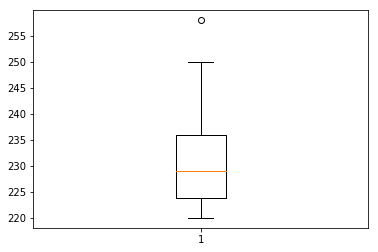

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(result_array)
plt.show()

In [14]:
result = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result.show()
result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect() # Command collect makes a list out of it
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
print(result_array_ts[:15])
print(result_array_voltage[:15])

+-------+-------------+
|voltage|           ts|
+-------+-------------+
|    221|1547808722910|
|    223|1547808725914|
|    222|1547808728916|
|    236|1547808731918|
|    234|1547808734922|
|    234|1547808737926|
|    235|1547808740927|
|    235|1547808743928|
|    222|1547808746929|
|    225|1547808749929|
|    227|1547808752930|
|    224|1547808755932|
|    235|1547808758933|
|    230|1547808761934|
|    221|1547808764937|
|    224|1547808767938|
|    239|1547808770939|
|    228|1547808773944|
|    235|1547808776948|
|    220|1547808779950|
+-------+-------------+
only showing top 20 rows

[1547808737926, 1547808797959, 1547808806965, 1547808809967, 1547808812970, 1547808824978, 1547808843029, 1547808876043, 1547808897083, 1547808972147, 1547809053217, 1547809083238, 1547809113256, 1547809125263, 1547809131265]
[234, 233, 221, 229, 227, 237, 238, 221, 223, 222, 226, 224, 233, 237, 225]


In [15]:
spark.sql("select min(ts),max(ts) from washing").show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1547808720911|1547810064867|
+-------------+-------------+



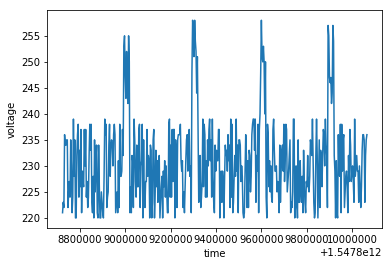

In [16]:
result = spark.sql(
"""
select voltage,ts from washing 
    where voltage is not null and 
    ts > 1547808720911 and
    ts <= 1547810064867+3600000
    order by ts asc
""") # This doesn't seem right to me
result_rdd = result.rdd.map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [17]:
result_array_ts[-1] - result_array_ts[0]

1341928

In [18]:
result_array_ts

[1547808722910,
 1547808725914,
 1547808728916,
 1547808731918,
 1547808734922,
 1547808737926,
 1547808740927,
 1547808743928,
 1547808746929,
 1547808749929,
 1547808752930,
 1547808755932,
 1547808758933,
 1547808761934,
 1547808764937,
 1547808767938,
 1547808770939,
 1547808773944,
 1547808776948,
 1547808779950,
 1547808782951,
 1547808785954,
 1547808788955,
 1547808791957,
 1547808794957,
 1547808797959,
 1547808800960,
 1547808803962,
 1547808806965,
 1547808809967,
 1547808812970,
 1547808815972,
 1547808818973,
 1547808821976,
 1547808824978,
 1547808827980,
 1547808830981,
 1547808833983,
 1547808836984,
 1547808840028,
 1547808843029,
 1547808846029,
 1547808849030,
 1547808852031,
 1547808855034,
 1547808858035,
 1547808861036,
 1547808864037,
 1547808867039,
 1547808870039,
 1547808873042,
 1547808876043,
 1547808879044,
 1547808882045,
 1547808885074,
 1547808888076,
 1547808891076,
 1547808894081,
 1547808897083,
 1547808900085,
 1547808903087,
 1547808906089,
 1547808

In [19]:
result_df = spark.sql("""
select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null
""")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()

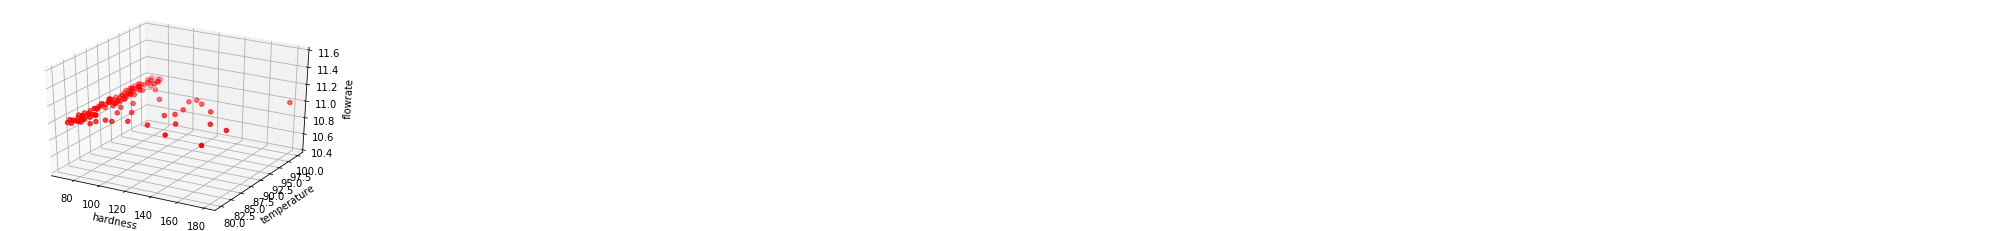

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

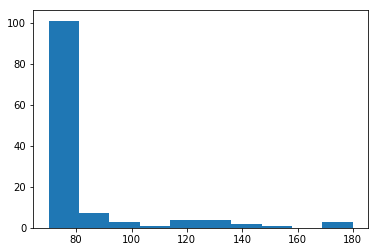

In [21]:
plt.hist(result_array_hardness)
plt.show()